In [3]:
install.packages("readr")

Installation du package dans 'C:/Users/oussa/AppData/Local/R/win-library/4.5'
(car 'lib' n'est pas spécifié)

installation des dépendances 'bit', 'prettyunits', 'bit64', 'progress', 'clipr', 'hms', 'vroom', 'tzdb'




le package 'bit' a été décompressé et les sommes MD5 ont été vérifiées avec succés
le package 'prettyunits' a été décompressé et les sommes MD5 ont été vérifiées avec succés
le package 'bit64' a été décompressé et les sommes MD5 ont été vérifiées avec succés
le package 'progress' a été décompressé et les sommes MD5 ont été vérifiées avec succés
le package 'clipr' a été décompressé et les sommes MD5 ont été vérifiées avec succés
le package 'hms' a été décompressé et les sommes MD5 ont été vérifiées avec succés
le package 'vroom' a été décompressé et les sommes MD5 ont été vérifiées avec succés
le package 'tzdb' a été décompressé et les sommes MD5 ont été vérifiées avec succés
le package 'readr' a été décompressé et les sommes MD5 ont été vérifiées avec succés

Les packages binaires téléchargés sont dans
	C:\Users\oussa\AppData\Local\Temp\RtmpGcFHDS\downloaded_packages


In [1]:
library(readr)

Warning message:
"le package 'readr' a été compilé avec la version R 4.5.2"


In [2]:
spe <- read_delim("MQU_spe.txt", delim = "\t")
env <- read_delim("MQU_env.txt", delim = "\t")
traits <- read_delim("MQU_traits.txt", delim = "\t")
loc <- loc <- read_delim("MQU_loc.txt", delim = "\t")

New names:
• `` -> `...1`
Rows: 9 Columns: 90
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): ...1
dbl (89): Acer palmatum var. pubescens, Acer serrulatum, Ardisia quinquegona...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 9 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Locality code
dbl (2): Elevation, pH

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 89 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Species
dbl (5): SLA, LDMC, LT, LA, SSD

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types =

In [3]:
traits_norm_z <- traits

numeric_cols <- sapply(traits_norm_z, is.numeric)

traits_norm_z[numeric_cols] <- scale(traits_norm_z[numeric_cols])

In [6]:
install.packages("NbClust")

Installation du package dans 'C:/Users/oussa/AppData/Local/R/win-library/4.5'
(car 'lib' n'est pas spécifié)



le package 'NbClust' a été décompressé et les sommes MD5 ont été vérifiées avec succés

Les packages binaires téléchargés sont dans
	C:\Users\oussa\AppData\Local\Temp\RtmpmOPUQl\downloaded_packages


In [ ]:
# library(dplyr)

# spe$site <- rownames(spe)


# species_cols <- setdiff(names(spe), "site")

# spe_rel <- spe %>%
#   rowwise() %>%
#   mutate(total_individuals = sum(c_across(all_of(species_cols)), na.rm = TRUE)) %>%
#   mutate(across(all_of(species_cols),
#                 ~ .x / total_individuals,
#                 .names = "{.col}")) %>%   # overwrite species values with RA (0–1)
#   ungroup() %>%
#   select(site, all_of(species_cols))

# spe_rel_env <- spe_rel %>%
#   left_join(env, by = c("site" = "Locality.code"))


#### Code from alena for number of clusters

In [11]:
library(NbClust)
library(vegan)
library(dplyr)

Warning message:
"le package 'dplyr' a été compilé avec la version R 4.5.2"



Attachement du package : 'dplyr'


Les objets suivants sont masqués depuis 'package:stats':

    filter, lag


Les objets suivants sont masqués depuis 'package:base':

    intersect, setdiff, setequal, union




In [ ]:
# # Prepare numeric traits only (exclude non-numeric columns)
# traits_numeric <- traits_norm_z %>%
#   select(where(is.numeric))

# # Calculate distance matrix (using Euclidean distance for traits)
# distance_mat <- dist(traits_numeric, method = "euclidean")


In [ ]:
# # Alternative approach using base R (no need for column_to_rownames)
# # Use the already normalized traits from earlier
# traits_numeric_base <- traits_norm_z[, sapply(traits_norm_z, is.numeric)]

# # Calculate the distance matrix
# distance_mat_alt <- dist(traits_numeric_base, method = "euclidean")

In [23]:
spe <- spe %>% 
  rename(site = `...1`)

env <- env %>%
  rename(site = `Locality code`)

loc <- loc %>%
  rename(site = `Locality code`)


In [26]:
# Use base R to set row names
traits_numeric <- as.data.frame(traits[, -1])  # Remove first column
rownames(traits_numeric) <- traits[[1]]  # Set first column as row names

# Normalize the traits
traits_norm <- decostand(traits_numeric, "normalize")

# Calculate the distance matrix from normalized traits
distance_mat <- vegdist(traits_norm, "euc")  # Euclidean distance of normalized traits

In [27]:
library(vegan)
#install.packages("FD")   # run once
library(FD)

# Remove site column and keep only species abundances (base R approach)
spe_mat <- as.matrix(spe[, -which(names(spe) == "site")])
rownames(spe_mat) <- spe$site

# Make sure species order matches traits
spe_mat <- spe_mat[, rownames(traits_norm)]

# Compute CWM
CWM <- functcomp(traits_norm, spe_mat, CWM.type = "all")

head(CWM)

,SLA,LDMC,LT,LA,SSD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M01,0.005213919,0.1686588,0.0001100839,0.9783342,0.0002245132
M02,0.005804946,0.1861906,0.0001268773,0.9785738,0.0002536350
M03,0.005992936,0.1323559,0.0000965541,0.9867725,0.0001868837
Q01,0.006931490,0.3027101,0.0002016242,0.9418221,0.0004369493
Q02,0.006702971,0.2913636,0.0002364804,0.9474044,0.0003730075
Q03,0.005808443,0.2376944,0.0001861185,0.9681031,0.0003292314


In [28]:
# Use base R to set row names
traits_numeric <- as.data.frame(traits[, -1])  # Remove first column
rownames(traits_numeric) <- traits[[1]]  # Set first column as row names

# Normalize the traits
traits_norm <- decostand(traits_numeric, "normalize")

# Calculate the distance matrix from normalized traits
distance_mat <- vegdist(traits_norm, "euc")  # Euclidean distance of normalized traits


In [29]:
Nb.UPGMA <- NbClust(
  traits_numeric,     # Input Spe matrix 
  diss = distance_mat,# Chord distance matrix for spe
  distance = NULL,    # Distance metric is NULL because we provide 'diss' directly
  min.nc = 2,         # Minimum number of clusters to test (start at 2)
  max.nc = 16,        # Maximum number of clusters to test (up to 16)
  method = "average", # Clustering linkage method: centroid linkage here
  index = "ch"        # Evaluation criterion: Calinski-Harabasz index
)

Nb.UPGMA  

$All.index
      2       3       4       5       6       7       8       9      10      11 
 0.1891  1.2685  2.3073  1.7107  2.9109 29.7449 25.2204 21.7963 19.7911 17.5874 
     12      13      14      15      16 
15.8310 14.3253 13.2244 12.1184 11.1904 

$Best.nc
Number_clusters     Value_Index 
         7.0000         29.7449 

$Best.partition
             Acer palmatum var. pubescens 
                                        1 
                          Acer serrulatum 
                                        2 
                      Ardisia quinquegona 
                                        1 
                          Barthea barthei 
                                        2 
                  Blastus cochinchinensis 
                                        3 
                      Camellia brevistyla 
                                        4 
                      Camellia tenuifolia 
                                        4 
      Castanopsis cuspidata var. carlesii 
                                        1 
      Chamaecyparis obtusa var. formosana 
                                        5 
                     Cinnamomum kanehirae 
                                        3 
                    Cinnamomum subavenium 
                                        4 
         Cleyera japonica var. longicarpa 
                                        1 
        Cleyera japonica var. taipinensis 
                                        2 
                    Cryptocarya chinensis 
                                        2 
                 Cyclobalanopsis longinux 
                                        4 
                    Cyclobalanopsis morii 
                                        1 
             Cyclobalanopsis sessilifolia 
                                        1 
Daphniphyllum glaucescens subsp. oldhamii 
                                        3 
                     Dendropanax dentiger 
                                        2 
                     Diospyros morrisiana 
                                        2 
                    Elaeocarpus japonicus 
                                        2 
                 Engelhardia roxburghiana 
                                        3 
                       Eurya crenatifolia 
                                        6 
                         Eurya glaberrima 
                                        1 
                          Eurya loquaiana 
                                        4 
                         Fatsia polycarpa 
                                        7 
             Ficus erecta var. beecheyana 
                                        3 
                      Fraxinus griffithii 
                                        1 
                    Glochidion acuminatum 
                                        2 
                        Glochidion rubrum 
                                        3 
                        Helicia formosana 
                                        7 
                            Ilex ficoidea 
                                        1 
                           Ilex formosana 
                                        2 
                          Ilex goshiensis 
                                        4 
                            Ilex hayatana 
                                        4 
                       Ilex lonicerifolia 
                                        1 
                        Illicium anisatum 
                                        2 
                     Illicium arborescens 
                                        3 
                          Itea parviflora 
                                        3 
                        Lasianthus fordii 
                                        3 
                     Lasianthus wallichii 
                                        2 
                           Limlia uraiana 
                                        4 
                         Litsea acuminat

In [38]:
# Extract the index values for different numbers of clusters
all_indices <- Nb.UPGMA$All.index

# Take the first 6 index values
first_6_indices <- all_indices[1:6]

# Display them
first_6_indices

# Or if you want just the values as a vector
vect_6_indexes <- as.vector(first_6_indices)

2       3       4       5       6       7 
 0.1891  1.2685  2.3073  1.7107  2.9109 29.7449

In [39]:
cluster_heights <- c(vect_6_indexes)

# Perform hierarchical clustering
hc_upgma <- hclust(distance_mat, method = "average")

# Cut tree at 7 clusters (or use your specific heights)
clusters_7 <- cutree(hc_upgma, k = 7)

# Add cluster assignments to traits
traits_with_clusters <- traits %>%
  mutate(cluster = clusters_7)

traits_with_clusters 

Species,SLA,LDMC,LT,LA,SSD,cluster
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Acer palmatum var. pubescens,22.0,427.3,0.14,1785,0.61,1
Acer serrulatum,19.1,446.6,0.15,2534,0.61,2
Ardisia quinquegona,11.3,423.1,0.21,1428,0.60,1
Barthea barthei,20.8,301.6,0.28,1504,0.54,2
Blastus cochinchinensis,31.7,267.8,0.19,3628,0.50,3
Camellia brevistyla,10.3,409.4,0.32,796,0.57,4
Camellia tenuifolia,9.9,420.7,0.34,854,0.56,4
Castanopsis cuspidata var. carlesii,9.8,473.6,0.32,1816,0.55,1
Chamaecyparis obtusa var. formosana,7.2,461.6,0.71,756,0.47,5


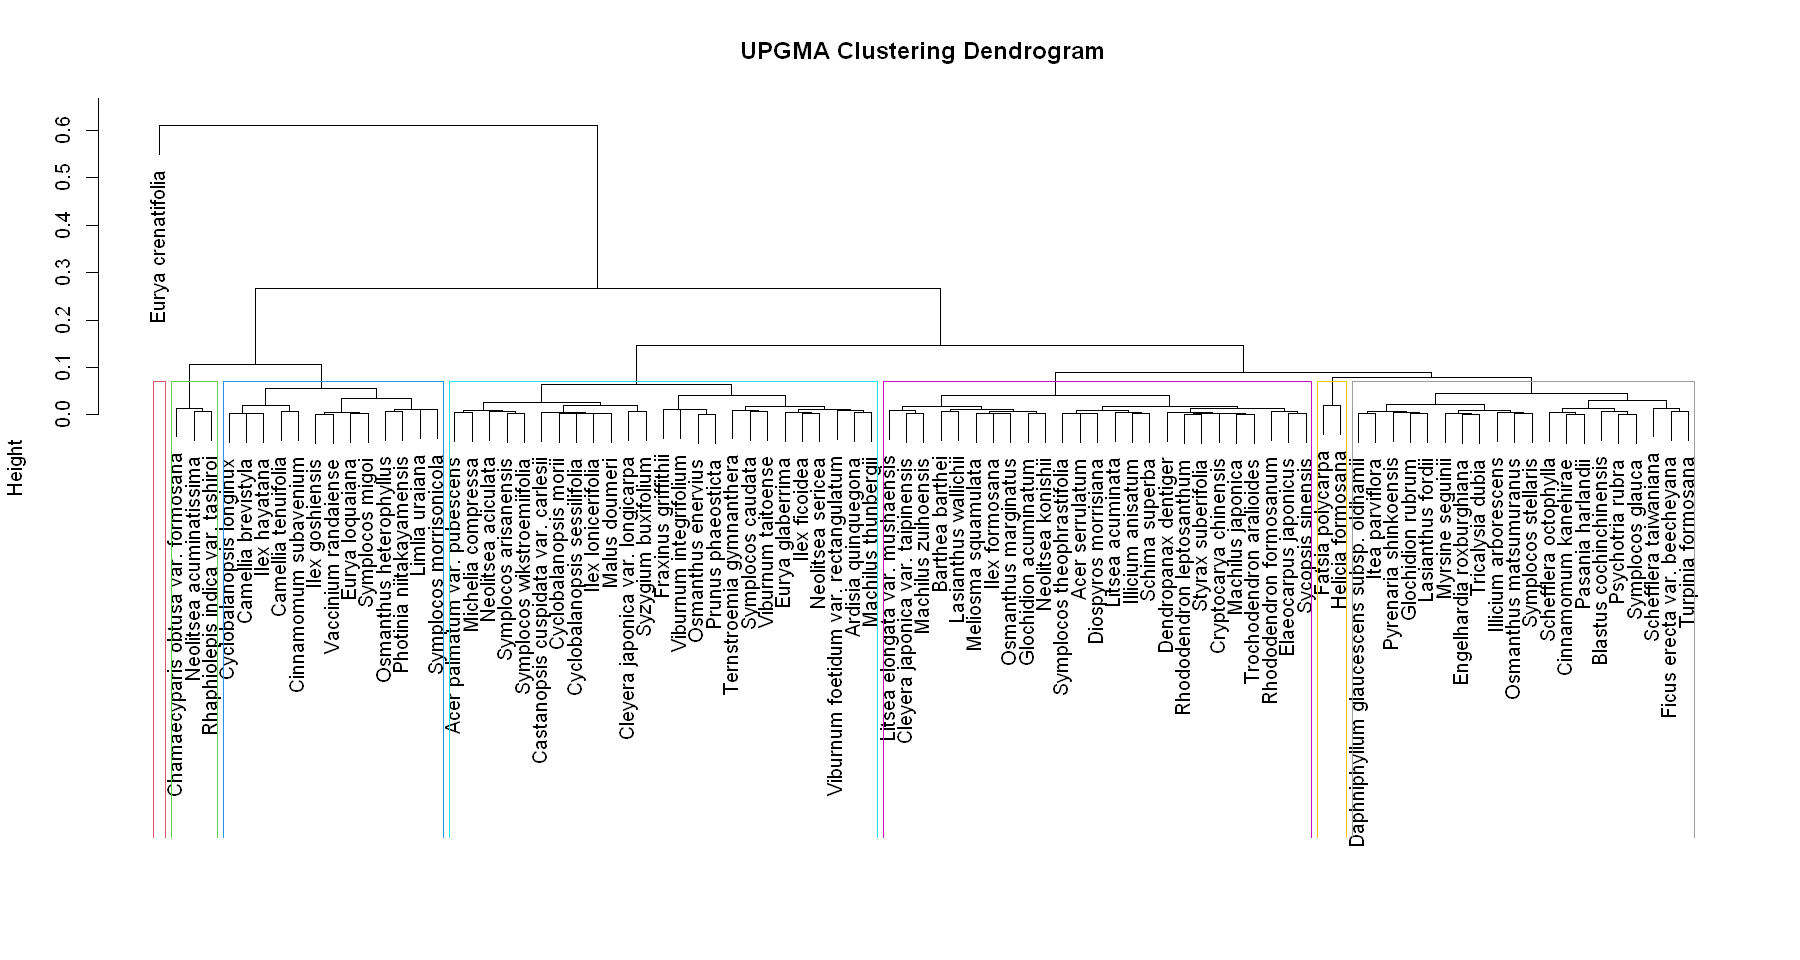

In [43]:
# Set plot size and white background
options(repr.plot.width = 15, repr.plot.height = 8)
par(bg = "white")

# Plot the dendrogram
plot(hc_upgma, main = "UPGMA Clustering Dendrogram", xlab = "", sub = "")

# Add rectangles around the 7 clusters
rect.hclust(hc_upgma, k = 7, border = 2:8)

Installation du package dans 'C:/Users/oussa/AppData/Local/R/win-library/4.5'
(car 'lib' n'est pas spécifié)



installation des dépendances 'farver', 'labeling', 'RColorBrewer', 'gtable', 'isoband', 'S7', 'scales', 'viridisLite', 'gridExtra', 'ggplot2', 'viridis'




le package 'farver' a été décompressé et les sommes MD5 ont été vérifiées avec succés
le package 'labeling' a été décompressé et les sommes MD5 ont été vérifiées avec succés
le package 'RColorBrewer' a été décompressé et les sommes MD5 ont été vérifiées avec succés
le package 'gtable' a été décompressé et les sommes MD5 ont été vérifiées avec succés
le package 'isoband' a été décompressé et les sommes MD5 ont été vérifiées avec succés
le package 'S7' a été décompressé et les sommes MD5 ont été vérifiées avec succés
le package 'scales' a été décompressé et les sommes MD5 ont été vérifiées avec succés
le package 'viridisLite' a été décompressé et les sommes MD5 ont été vérifiées avec succés
le package 'gridExtra' a été décompressé et les sommes MD5 ont été vérifiées avec succés
le package 'ggplot2' a été décompressé et les sommes MD5 ont été vérifiées avec succés
le package 'viridis' a été décompressé et les sommes MD5 ont été vérifiées avec succés
le package 'dendextend' a été décompres

Warning message:
"le package 'dendextend' a été compilé avec la version R 4.5.2"
Registered S3 method overwritten by 'dendextend':
  method     from 
  rev.hclust vegan


---------------------
Welcome to dendextend version 1.19.1
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attachement du package : 'dendextend'


Les objets suivants sont masqués depuis 'package:ape':

    ladderize, rotate


L'objet suivant est masqué depuis 'package:permute':

    shuffle


L'objet suivant est masqué depuis 'package:stats':

    c

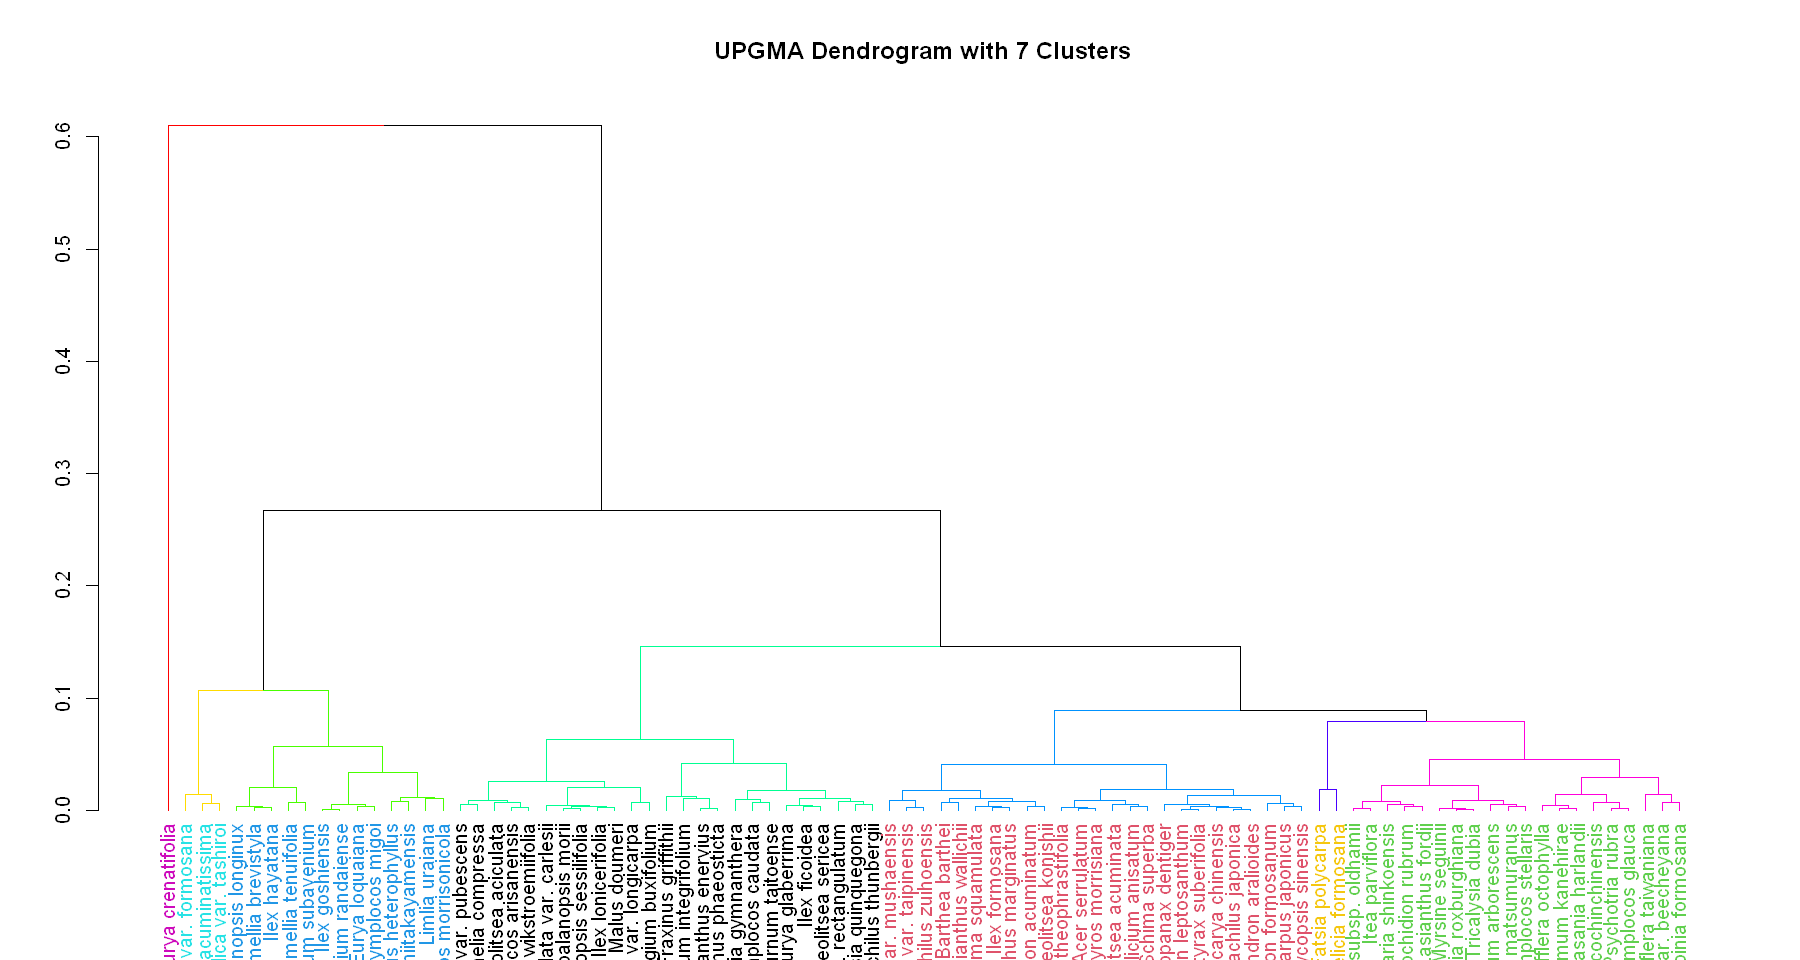

In [ ]:
# Install dendextend if needed
#install.packages("dendextend")
library(dendextend)

# Convert the hierarchical clustering result into a dendrogram object
UPGMA.dend <- as.dendrogram(hc_upgma)

# Use the already calculated NbClust results and cluster assignments
colors_to_use <- clusters_7

# Reorder the cluster assignments to match the order of dendrogram leaves
colors_to_use <- colors_to_use[order.dendrogram(UPGMA.dend)]

# Set the tip label colors according to the cluster assignments
labels_colors(UPGMA.dend) <- colors_to_use

# Color the branches of the dendrogram according to 7 clusters
UPGMA.dend <- color_branches(UPGMA.dend, k = 7)

# Set white background and plot size
par(bg = "white")
options(repr.plot.width = 15, repr.plot.height = 8)

# Plot the final colored dendrogram
plot(UPGMA.dend, main = "UPGMA Dendrogram with 7 Clusters")